# Load Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Dataset

In [3]:
# 판다스의 read_csv를 활용해 train.csv 파일을 읽어옵니다.
# 읽어온 데이터를 train이라는 이름의 변수에 할당합니다.
train = pd.read_csv("train.csv")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# head()로 train 데이터의 상위 5개를 띄웁니다.
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
# 판다스의 read_csv를 활용해 train.csv 파일을 읽어옵니다.
# 읽어온 데이터를 train이라는 이름의 변수에 할당합니다.
test = pd.read_csv("test.csv")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# head()로 train 데이터의 상위 5개를 띄웁니다.
test.head()

(884262, 7)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


# EDA

## Dates

In [5]:
train["Dates"] = pd.to_datetime(train["Dates"])

train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

print(train.shape)
train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(878049, 15)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


In [6]:
X_outliers = (train["X"] == train["X"].max())
Y_outliers = (train["Y"] == train["Y"].max())

outlier = train[X_outliers & Y_outliers]
non_outliers = train[~(X_outliers & Y_outliers)]
print(outlier.shape)
outlier.head()

(67, 15)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,2005,12,30,17,0,0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,2005,12,29,0,7,0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,2005,11,30,11,25,0


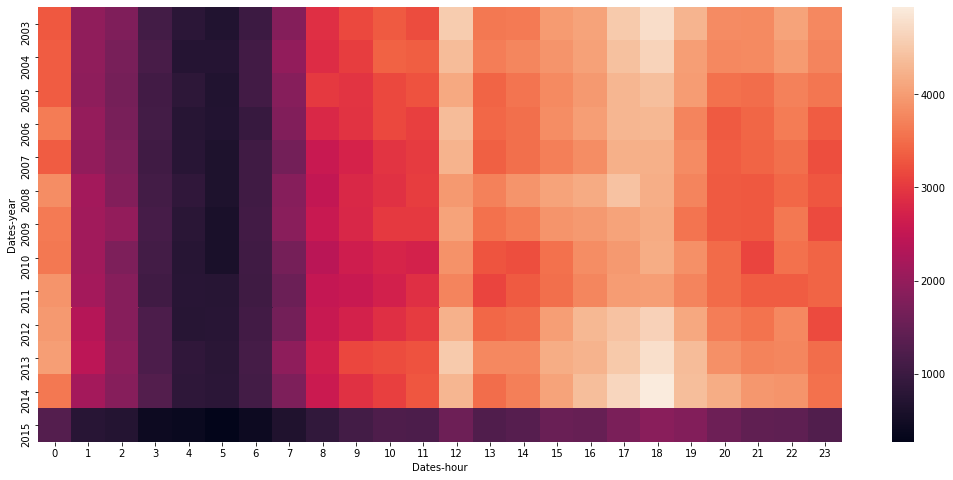

In [14]:
plt.figure(figsize=(18,8))
sns.heatmap(train.pivot_table(columns='Dates-hour', 
                              index='Dates-year', 
                              values='Dates', 
                              aggfunc='count')
           )

### 이상치 제거한 non_outliers로 진행

#### **```주말 및 평일```** 그룹화

- 토/일 주말로 하여 feature에 넣어보기

In [7]:
non_outliers['DayOfWeek_weekend'] = (non_outliers['DayOfWeek'] == 'Saturday') | (non_outliers['DayOfWeek'] == 'Sunday')

non_outliers[['DayOfWeek','DayOfWeek_weekend']].head()

C:\Users\Johns\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DayOfWeek,DayOfWeek_weekend
0,Wednesday,False
1,Wednesday,False
2,Wednesday,False
3,Wednesday,False
4,Wednesday,False


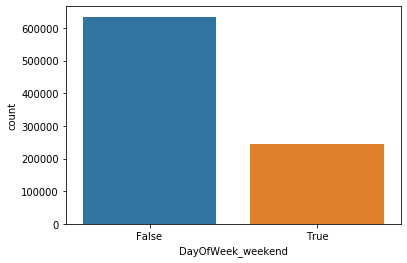

In [8]:
sns.countplot(data=non_outliers, x='DayOfWeek_weekend')

#### **```'분'```** 전처리

In [9]:
def summary_minute(minute):
    
#     print(minute)
    
    if (minute > 0) and (minute < 16):
        minute = 15
        return minute
    
    elif (minute > 15) and (minute < 31):
        minute = 30
        return minute
    
    elif (minute > 30) and (minute < 46):
        minute = 45
        return minute
    
    elif (minute > 45):
        minute = 0
        return minute
    
    elif (minute < 1):
        minute = 0
        return minute
    
non_outliers['Dates-minute(clean)'] = non_outliers['Dates-minute'].apply(summary_minute)

non_outliers[['Dates-minute', 'Dates-minute(clean)']].head()

C:\Users\Johns\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Dates-minute,Dates-minute(clean)
0,53,0
1,53,0
2,33,45
3,30,30
4,30,30


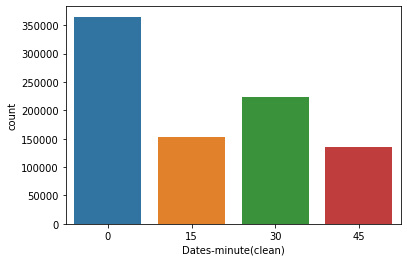

In [10]:
sns.countplot(data=non_outliers, x='Dates-minute(clean)')

#### **```'주소'```** 전처리

교차로만 True

In [11]:
non_outliers['Crossroad'] = non_outliers['Address'].str.contains('/')

non_outliers[['Address','Crossroad']].head()

C:\Users\Johns\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Address,Crossroad
0,OAK ST / LAGUNA ST,True
1,OAK ST / LAGUNA ST,True
2,VANNESS AV / GREENWICH ST,True
3,1500 Block of LOMBARD ST,False
4,100 Block of BRODERICK ST,False


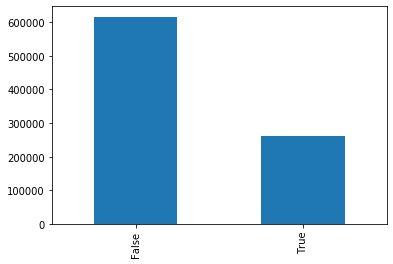

In [12]:
non_outliers['Crossroad'].value_counts().plot.bar()

In [13]:
test['Crossroad'] = test['Address'].str.contains('/')

test[['Address','Crossroad']].head()

,Address,Crossroad
0,2000 Block of THOMAS AV,False
1,3RD ST / REVERE AV,True
2,2000 Block of GOUGH ST,False
3,4700 Block of MISSION ST,False
4,4700 Block of MISSION ST,False


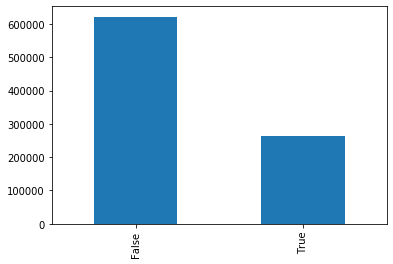

In [14]:
test['Crossroad'].value_counts().plot.bar()

worst block 이랑 worst st top1 분류

In [15]:
non_outliers['WorstOfBlock'] = (non_outliers['Crossroad']=='800 Block of BRYANT ST')

non_outliers['WorstOfST'] = (non_outliers['Crossroad']=='16TH ST / MISSION ST')

non_outliers[['Address','WorstOfBlock','WorstOfST']].head()

C:\Users\Johns\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\Johns\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Johns\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Th

,Address,WorstOfBlock,WorstOfST
0,OAK ST / LAGUNA ST,False,False
1,OAK ST / LAGUNA ST,False,False
2,VANNESS AV / GREENWICH ST,False,False
3,1500 Block of LOMBARD ST,False,False
4,100 Block of BRODERICK ST,False,False


In [16]:
test['WorstOfBlock'] = test['Crossroad']=='800 Block of BRYANT ST'

test['WorstOfST'] = test['Crossroad']=='16TH ST / MISSION ST'

test[['Address','WorstOfBlock','WorstOfST']].head()

C:\Users\Johns\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Address,WorstOfBlock,WorstOfST
0,2000 Block of THOMAS AV,False,False
1,3RD ST / REVERE AV,False,False
2,2000 Block of GOUGH ST,False,False
3,4700 Block of MISSION ST,False,False
4,4700 Block of MISSION ST,False,False


도로명 WY, AV, ST, DR, BL, MA 분리하기

In [17]:
def findname(data):
    
    if '/' in data:
        return 'Crossroad'
    
    elif 'ST' in data.split(' ')[-1]:
        return 'ST'
    
    elif 'AV' in data.split(' ')[-1]:
        return 'AV'
    
    else:
        return 'Others'
    
non_outliers['division_address'] = non_outliers['Address'].apply(findname)

non_outliers[['Address','division_address']].head()

C:\Users\Johns\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Address,division_address
0,OAK ST / LAGUNA ST,Crossroad
1,OAK ST / LAGUNA ST,Crossroad
2,VANNESS AV / GREENWICH ST,Crossroad
3,1500 Block of LOMBARD ST,ST
4,100 Block of BRODERICK ST,ST


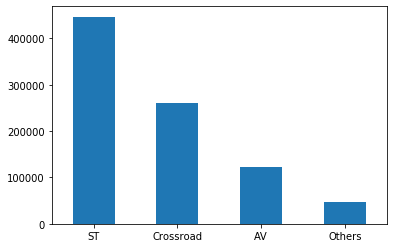

In [18]:
non_outliers['division_address'].value_counts().plot.bar(rot=0)

In [19]:
unnique_road_list = non_outliers['division_address'].unique()
unnique_road_list

array(['Crossroad', 'ST', 'AV', 'Others'], dtype=object)

In [20]:
for i in unnique_road_list:
    non_outliers[i] = non_outliers['division_address'] == i
    
non_outliers[['Address','ST', 'AV','Crossroad','Others']].head()

C:\Users\Johns\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Address,ST,AV,Crossroad,Others
0,OAK ST / LAGUNA ST,False,False,True,False
1,OAK ST / LAGUNA ST,False,False,True,False
2,VANNESS AV / GREENWICH ST,False,False,True,False
3,1500 Block of LOMBARD ST,True,False,False,False
4,100 Block of BRODERICK ST,True,False,False,False


In [21]:
def findname(data):
    
    if '/' in data:
        return 'Crossroad'
    
    elif 'ST' in data.split(' ')[-1]:
        return 'ST'
    
    elif 'AV' in data.split(' ')[-1]:
        return 'AV'
    
    else:
        return 'Others'
    
test['division_address'] = test['Address'].apply(findname)

test[['Address','division_address']].head()

,Address,division_address
0,2000 Block of THOMAS AV,AV
1,3RD ST / REVERE AV,Crossroad
2,2000 Block of GOUGH ST,ST
3,4700 Block of MISSION ST,ST
4,4700 Block of MISSION ST,ST


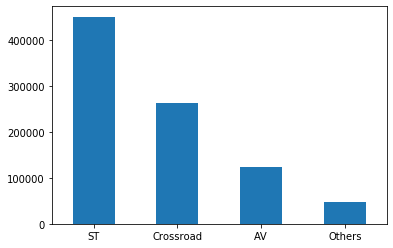

In [22]:
test['division_address'].value_counts().plot.bar(rot=0)

In [23]:
for i in unnique_road_list:
    test[i] = test['division_address'] == i
    
test[['Address','ST', 'AV','Crossroad','Others']].head()

,Address,ST,AV,Crossroad,Others
0,2000 Block of THOMAS AV,False,True,False,False
1,3RD ST / REVERE AV,False,False,True,False
2,2000 Block of GOUGH ST,True,False,False,False
3,4700 Block of MISSION ST,True,False,False,False
4,4700 Block of MISSION ST,True,False,False,False


#### **```요일```** 전처리 하기

In [24]:
non_outliers['DayOfWeek'].unique()

array(['Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday',
       'Thursday'], dtype=object)

In [25]:
dayofweek_list = ['Monday', ' Tuesday', 'Wednesday','Thursday', 'Friday','Saturday','Sunday']

In [26]:
for day in dayofweek_list:
    non_outliers[f'DayOfWeek_{day}'] = non_outliers['DayOfWeek'].str.contains(day)
        
# non_outliers[['DayOfWeek','DayOfWeek_Monday',
#         'DayOfWeek_Tuesday','DayOfWeek_Wednesday',
#         'DayOfWeek_Thursday','DayOfWeek_Friday',
#         'DayOfWeek_Saturday','DayOfWeek_Sunday']]

non_outliers

C:\Users\Johns\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,ST,AV,Others,DayOfWeek_Monday,DayOfWeek_ Tuesday,DayOfWeek_Wednesday,DayOfWeek_Thursday,DayOfWeek_Friday,DayOfWeek_Saturday,DayOfWeek_Sunday
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,False,False,False,False,False,True,False,False,False,False
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,False,False,False,False,False,True,False,False,False,False
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,False,False,False,False,False,True,False,False,False,False
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,True,False,False,False,False,True,False,False,False,False
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,...,False,False,False,True,False,False,False,False,False,False
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003,...,True,False,False,True,False,False,False,False,False,False
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,...,False,False,False,True,False,False,False,False,False,False
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,...,False,False,False,True,False,False,False,False,False,False


In [27]:
# for day in dayofweek_list:
#     test[f'DayOfWeek_{day}'] = test['DayOfWeek'].str.contains(day)
        
# test[['DayOfWeek','DayOfWeek_Monday',
#         'DayOfWeek_Tuesday','DayOfWeek_Wednesday',
#         'DayOfWeek_Thursday','DayOfWeek_Friday',
#         'DayOfWeek_Saturday','DayOfWeek_Sunday']]

#### **```면적```** 전처리

지역당 면적계산(구글 맵 이용) 대략적인 면적 수치를 나타내었음.

1. NORTHERN : 6.90km^2(둘레 12.50km)
2. PARK : 7.37 km^2(둘레 13.17km)
3. INGLESIDE : 17.95km^2(둘레 22.14km)
4. BAYVIEW : 19.67km^2(둘레 25.75km)
5. RICHMOND : 8.71km^2(둘레 16.15km)
6. CENTRAL : 5.85km^2(둘레 10.58km)
7. TARAVAL : 20.69km^2(둘레 24.83km)
8. TENDERLOIN : 0.61km^2(둘레 3.51km)
9. MISSION : 7.43km^2(둘레 10.86km)
10. SOUTHERN : 4.38km^2(둘레 9.03km)

In [28]:
size_df = (pd
           .DataFrame(
               {'area':['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL','TARAVAL', 
                        'TENDERLOIN', 'MISSION', 'SOUTHERN'],
                'area(square kilometer)': [6.90, 7.37, 17.95, 19.67, 8.71, 5.85, 20.69, 0.61, 7.43, 4.38],
                'round(kilometer)':[12.50, 13.17, 22.14, 25.75, 16.15, 10.58, 24.83, 3.51, 10.86, 9.03]}
           )
          )

size_df

,area,area(square kilometer),round(kilometer)
0,NORTHERN,6.90,12.50
1,PARK,7.37,13.17
2,INGLESIDE,17.95,22.14
3,BAYVIEW,19.67,25.75
4,RICHMOND,8.71,16.15
5,CENTRAL,5.85,10.58
6,TARAVAL,20.69,24.83
7,TENDERLOIN,0.61,3.51
8,MISSION,7.43,10.86
9,SOUTHERN,4.38,9.03


In [29]:
empty_1 = size_df.iloc[7]
empty_1

area                      TENDERLOIN
area(square kilometer)          0.61
round(kilometer)                3.51
Name: 7, dtype: object

In [30]:
empty_1 = size_df.iloc[0]
empty_2 = size_df.iloc[1]
empty_3 = size_df.iloc[2]
empty_4 = size_df.iloc[3]
empty_5 = size_df.iloc[4]
empty_6 = size_df.iloc[5]
empty_7 = size_df.iloc[6]
empty_8 = size_df.iloc[7]
empty_9 = size_df.iloc[8]
empty_10 = size_df.iloc[9]


size_df.iloc[0] = empty_8
size_df.iloc[1] = empty_10
size_df.iloc[2] = empty_9
size_df.iloc[3] = empty_1
size_df.iloc[4] = empty_6
size_df.iloc[5] = empty_2
size_df.iloc[6] = empty_5
size_df.iloc[7] = empty_4
size_df.iloc[8] = empty_3
size_df.iloc[9] = empty_7



size_df.head()

,area,area(square kilometer),round(kilometer)
0,TENDERLOIN,0.61,3.51
1,SOUTHERN,4.38,9.03
2,MISSION,7.43,10.86
3,NORTHERN,6.90,12.50
4,CENTRAL,5.85,10.58


Text(0, 0.5, 'size(km^2)')

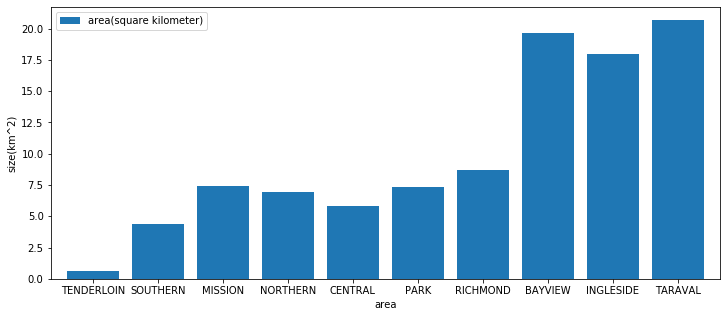

In [31]:
size_df.plot.bar(x='area', y='area(square kilometer)', rot=0, figsize=(12,5),width=0.8)
plt.ylabel('size(km^2)')

In [33]:
crime_count = pd.DataFrame(non_outliers['PdDistrict'].value_counts()).reset_index().rename({'index':'area'}, axis=1)

crime_count

,area,PdDistrict
0,SOUTHERN,157174
1,MISSION,119907
2,NORTHERN,105284
3,BAYVIEW,89422
4,CENTRAL,85455
5,TENDERLOIN,81794
6,INGLESIDE,78841
7,TARAVAL,65592
8,PARK,49311
9,RICHMOND,45202


In [34]:
crime_size_df = size_df.merge(crime_count, on='area', how='left').drop('round(kilometer)', axis=1)

crime_size_df

,area,area(square kilometer),PdDistrict
0,TENDERLOIN,0.61,81794
1,SOUTHERN,4.38,157174
2,MISSION,7.43,119907
3,NORTHERN,6.90,105284
4,CENTRAL,5.85,85455
5,PARK,7.37,49311
6,RICHMOND,8.71,45202
7,BAYVIEW,19.67,89422
8,INGLESIDE,17.95,78841
9,TARAVAL,20.69,65592


In [35]:
crime_size_df['district/area'] = crime_size_df['PdDistrict'] / crime_size_df['area(square kilometer)']

crime_size_df = crime_size_df.sort_values(by='district/area', ascending=False)

crime_size_df

,area,area(square kilometer),PdDistrict,district/area
0,TENDERLOIN,0.61,81794,134088.524590
1,SOUTHERN,4.38,157174,35884.474886
2,MISSION,7.43,119907,16138.223419
3,NORTHERN,6.90,105284,15258.550725
4,CENTRAL,5.85,85455,14607.692308
5,PARK,7.37,49311,6690.773406
6,RICHMOND,8.71,45202,5189.667049
7,BAYVIEW,19.67,89422,4546.110829
8,INGLESIDE,17.95,78841,4392.256267
9,TARAVAL,20.69,65592,3170.227163


In [36]:
area_list = ['TENDERLOIN', 'SOUTHERN', 'MISSION','NORTHERN', 'CENTRAL', 'PARK', 'RICHMOND', 'BAYVIEW','INGLESIDE', 'TARAVAL']

area_list

['TENDERLOIN',
 'SOUTHERN',
 'MISSION',
 'NORTHERN',
 'CENTRAL',
 'PARK',
 'RICHMOND',
 'BAYVIEW',
 'INGLESIDE',
 'TARAVAL']

Text(0, 0.5, 'km^2')

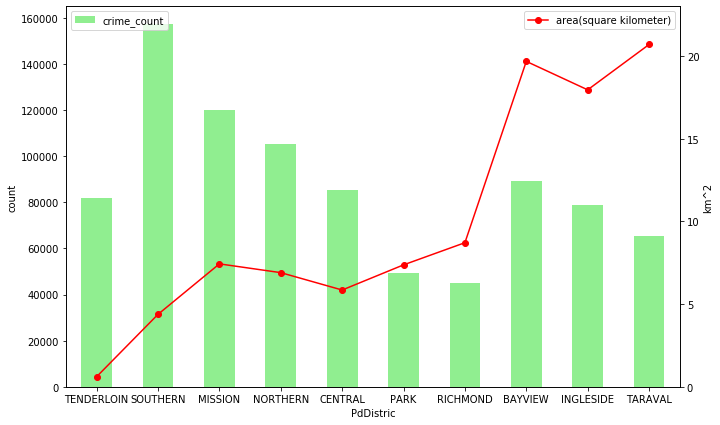

In [77]:
ax = crime_size_df.plot.bar(x='area', y='PdDistrict', figsize=(11,7), rot=0, color='lightgreen', label='crime_count')

ax2 = ax.twinx()

crime_size_df.plot(x='area', y='area(square kilometer)', figsize=(11,7), rot=0, marker='o', color='red', ax=ax2)

ax.legend(loc='upper left')
ax.set_xlabel('PdDistric')
ax2.legend(loc='upper right')
ax2.set_ylim(0,23)
ax.set_ylabel('count')
ax2.set_ylabel('km^2')

단위 면적당 범죄 발생수는 TENDERLOIN이 가장높았습니다. 

고위험군 지역, 중위험군 지역, 저위험군 지역으로 지역을 분류하여 보는 것도 방법일 것 같습니다.\
(* 정확한 위험군 나누기에 대한 판단 근거가 모호해 주관적으로 판단하여 분류함)

고위험군 지역 : tenderloin, southern\
중위험군 : mission, norhern, central\
저위험군 : park, richmond, bayview, ingleside, taraval

In [79]:
crime_size_df.loc[(crime_size_df['area'] == 'TENDERLOIN') | (crime_size_df['area'] == 'SOUTHERN'), 'risk_level'] = 'high'
crime_size_df.loc[(crime_size_df['area'] == 'MISSION') | 
                  (crime_size_df['area'] == 'NORTHERN')| 
                  (crime_size_df['area'] =='CENTRAL'), 'risk_level'] = 'middle'
crime_size_df.loc[(crime_size_df['area'] == 'PARK') |
                  (crime_size_df['area'] == 'RICHMOND') |
                  (crime_size_df['area'] == 'BAYVIEW')|
                  (crime_size_df['area'] == 'INGLESIDE')|
                  (crime_size_df['area'] == 'TARAVAL'), 'risk_level'] = 'low'

crime_size_df

,area,area(square kilometer),PdDistrict,district/area,risk_level
0,TENDERLOIN,0.61,81794,134088.524590,high
1,SOUTHERN,4.38,157174,35884.474886,high
2,MISSION,7.43,119907,16138.223419,middle
3,NORTHERN,6.90,105284,15258.550725,middle
4,CENTRAL,5.85,85455,14607.692308,middle
5,PARK,7.37,49311,6690.773406,low
6,RICHMOND,8.71,45202,5189.667049,low
7,BAYVIEW,19.67,89422,4546.110829,low
8,INGLESIDE,17.95,78841,4392.256267,low
9,TARAVAL,20.69,65592,3170.227163,low


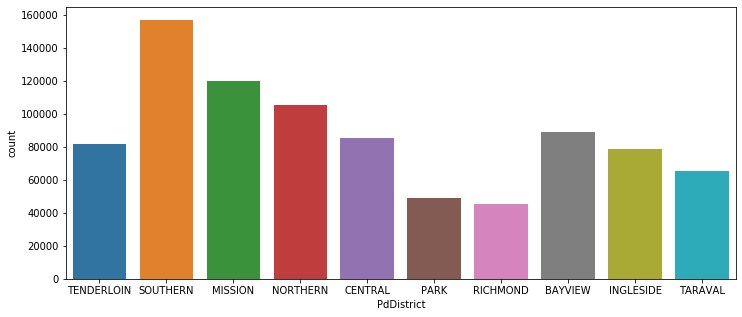

In [80]:
plt.figure(figsize=(12,5))
sns.countplot(data=non_outliers, x='PdDistrict', order=area_list)

In [81]:
district_map = crime_size_df[['area','risk_level']]
district_map

,area,risk_level
0,TENDERLOIN,high
1,SOUTHERN,high
2,MISSION,middle
3,NORTHERN,middle
4,CENTRAL,middle
5,PARK,low
6,RICHMOND,low
7,BAYVIEW,low
8,INGLESIDE,low
9,TARAVAL,low


In [82]:
df = non_outliers.merge(district_map, left_on='PdDistrict', right_on='area', how='left')

print(df.shape)
df.head()

(877982, 33)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,Others,DayOfWeek_Monday,DayOfWeek_ Tuesday,DayOfWeek_Wednesday,DayOfWeek_Thursday,DayOfWeek_Friday,DayOfWeek_Saturday,DayOfWeek_Sunday,area,risk_level
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,False,False,False,True,False,False,False,False,NORTHERN,middle
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,False,False,False,True,False,False,False,False,NORTHERN,middle
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,False,False,False,True,False,False,False,False,NORTHERN,middle
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,False,False,False,True,False,False,False,False,NORTHERN,middle
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,False,False,False,True,False,False,False,False,PARK,low


In [83]:
df['risk_level_high'] = df['risk_level'] == 'high'
df['risk_level_middle'] = df['risk_level'] == 'middle'
df['risk_level_low'] = df['risk_level'] == 'low'

print(df.shape)
df.head()

(877982, 36)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,DayOfWeek_Wednesday,DayOfWeek_Thursday,DayOfWeek_Friday,DayOfWeek_Saturday,DayOfWeek_Sunday,area,risk_level,risk_level_high,risk_level_middle,risk_level_low
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,True,False,False,False,False,NORTHERN,middle,False,True,False
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,True,False,False,False,False,NORTHERN,middle,False,True,False
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,True,False,False,False,False,NORTHERN,middle,False,True,False
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,True,False,False,False,False,NORTHERN,middle,False,True,False
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,True,False,False,False,False,PARK,low,False,False,True


In [84]:
test_df = test.merge(district_map, left_on='PdDistrict', right_on='area', how='left')

print(test_df.shape)
test_df.head()

(884262, 16)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Crossroad,WorstOfBlock,WorstOfST,division_address,ST,AV,Others,area,risk_level
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,False,False,False,AV,False,True,False,BAYVIEW,low
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,True,False,False,Crossroad,False,False,False,BAYVIEW,low
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,False,False,False,ST,True,False,False,NORTHERN,middle
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,False,False,False,ST,True,False,False,INGLESIDE,low
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,False,False,False,ST,True,False,False,INGLESIDE,low


In [85]:
test_df['risk_level_high'] = test_df['risk_level'] == 'high'
test_df['risk_level_middle'] = test_df['risk_level'] == 'middle'
test_df['risk_level_low'] = test_df['risk_level'] == 'low'

print(test_df.shape)
test_df.head()

(884262, 19)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Crossroad,WorstOfBlock,WorstOfST,division_address,ST,AV,Others,area,risk_level,risk_level_high,risk_level_middle,risk_level_low
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,False,False,False,AV,False,True,False,BAYVIEW,low,False,False,True
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,True,False,False,Crossroad,False,False,False,BAYVIEW,low,False,False,True
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,False,False,False,ST,True,False,False,NORTHERN,middle,False,True,False
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,False,False,False,ST,True,False,False,INGLESIDE,low,False,False,True
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,False,False,False,ST,True,False,False,INGLESIDE,low,False,False,True


#### **```거리```** 전처리

범죄가 가장 많이 일어나는 지역의 X, Y 평균 위치로부터 떨어진 각 지점의 평균 위치까지의 거리를 계산해보겠습니다.

##### 기준 shouthern

In [127]:
avg_distirct = non_outliers.pivot_table(index='PdDistrict', values=['X','Y']).reset_index()

avg_distirct['x_differnce'] = abs(avg_distirct['X'] - avg_distirct.loc[avg_distirct['PdDistrict']=='SOUTHERN', 'X'].unique())
avg_distirct['y_differnce'] = abs(avg_distirct['Y'] - avg_distirct.loc[avg_distirct['PdDistrict']=='SOUTHERN', 'Y'].unique())

avg_distirct['distance'] = np.sqrt(avg_distirct['x_differnce']**2 + avg_distirct['y_differnce']**2)

avg_distirct = avg_distirct.sort_values(by='distance').reset_index(drop=True)

avg_distirct

,PdDistrict,X,Y,x_differnce,y_differnce,distance
0,SOUTHERN,-122.405282,37.779915,0.000000,0.000000,0.000000
1,TENDERLOIN,-122.412503,37.783802,0.007221,0.003888,0.008201
2,CENTRAL,-122.409619,37.795685,0.004337,0.015770,0.016356
3,NORTHERN,-122.426647,37.786379,0.021365,0.006464,0.022322
4,MISSION,-122.419409,37.759961,0.014127,0.019954,0.024449
5,PARK,-122.445448,37.770299,0.040166,0.009615,0.041301
6,BAYVIEW,-122.393550,37.737256,0.011732,0.042659,0.044243
7,INGLESIDE,-122.428831,37.726543,0.023549,0.053372,0.058336
8,RICHMOND,-122.470087,37.780208,0.064805,0.000293,0.064806
9,TARAVAL,-122.477335,37.737549,0.072053,0.042366,0.083585


In [128]:
total_district = (avg_distirct
                  .merge(crime_size_df, left_on='PdDistrict', right_on='area', how='left')
                  .drop('PdDistrict_x', axis=1)
                 .rename({'PdDistrict_y':'crime_count', 'X':'AvgX', 'Y':'AvgY'}, axis=1))

total_district = total_district[['area','area(square kilometer)','crime_count','district/area',
                          'risk_level', 'AvgX','AvgY','x_differnce','y_differnce','distance',]]

total_district.sort_values(by='crime_count')

,area,area(square kilometer),crime_count,district/area,risk_level,AvgX,AvgY,x_differnce,y_differnce,distance
8,RICHMOND,8.71,45202,5189.667049,low,-122.470087,37.780208,0.064805,0.000293,0.064806
5,PARK,7.37,49311,6690.773406,low,-122.445448,37.770299,0.040166,0.009615,0.041301
9,TARAVAL,20.69,65592,3170.227163,low,-122.477335,37.737549,0.072053,0.042366,0.083585
7,INGLESIDE,17.95,78841,4392.256267,low,-122.428831,37.726543,0.023549,0.053372,0.058336
1,TENDERLOIN,0.61,81794,134088.524590,high,-122.412503,37.783802,0.007221,0.003888,0.008201
2,CENTRAL,5.85,85455,14607.692308,middle,-122.409619,37.795685,0.004337,0.015770,0.016356
6,BAYVIEW,19.67,89422,4546.110829,low,-122.393550,37.737256,0.011732,0.042659,0.044243
3,NORTHERN,6.90,105284,15258.550725,middle,-122.426647,37.786379,0.021365,0.006464,0.022322
4,MISSION,7.43,119907,16138.223419,middle,-122.419409,37.759961,0.014127,0.019954,0.024449
0,SOUTHERN,4.38,157174,35884.474886,high,-122.405282,37.779915,0.000000,0.000000,0.000000


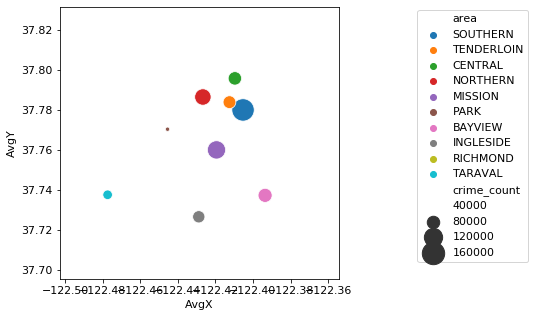

In [129]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=total_district, x='AvgX', y='AvgY', hue='area', size='crime_count', sizes=(0,500) )
plt.legend(loc='upper right', bbox_to_anchor=(1.7,1.01))

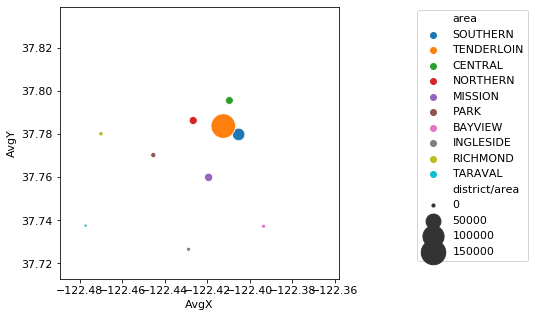

In [130]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=total_district, x='AvgX', y='AvgY', hue='area', size='district/area', sizes=(10,600) )
plt.legend(loc='upper right', bbox_to_anchor=(1.7,1.01))

범죄가 가장 많이 일어난 southern을 기준으로 각 구격의 평균치에 해당하는 곳까지의 거리를 구하여 시각화 해보았습니다.

- southern 에 근접한 tenderloin이나, central의 범죄 발생수는 많지 않지만 면적대비 범죄 발생수가 5위에 달합니다.
- 거리가 멀수록 범죄발생수가 좀 적어지는 것을 볼 수 있는데 상관관계를 통해 상관계수를 확인해보겠습니다.

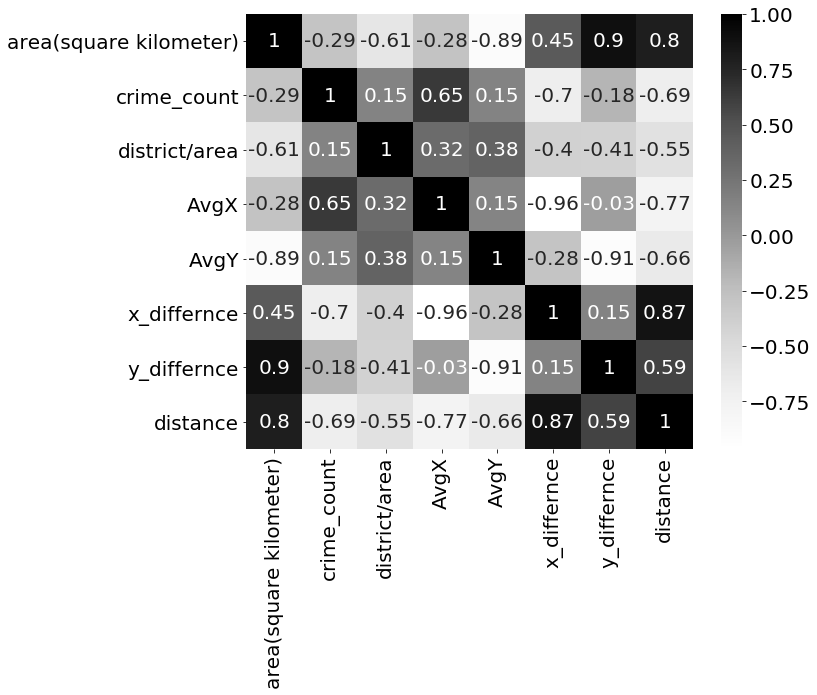

In [142]:
plt.figure(figsize=(10,8))
sns.heatmap(total_district.corr(), annot=True, cmap='Greys')
plt.rc('font', size= 20)

범죄 발생 수와 거리는 -0.69로 강한 수준은 아니지만 약 -0.7 수준으로 음의 상관관계를 가진다고 볼 수 있습니다.

##### 기준 tederloin

In [143]:
avg_distirct['x_differnce'] = abs(avg_distirct['X'] - avg_distirct.loc[avg_distirct['PdDistrict']=='TENDERLOIN', 'X'].unique())
avg_distirct['y_differnce'] = abs(avg_distirct['Y'] - avg_distirct.loc[avg_distirct['PdDistrict']=='TENDERLOIN', 'Y'].unique())

avg_distirct['distance'] = np.sqrt(avg_distirct['x_differnce']**2 + avg_distirct['y_differnce']**2)

avg_distirct = avg_distirct.sort_values(by='distance').reset_index(drop=True)

avg_distirct

,PdDistrict,X,Y,x_differnce,y_differnce,distance
0,TENDERLOIN,-122.412503,37.783802,0.000000,0.000000,0.000000
1,SOUTHERN,-122.405282,37.779915,0.007221,0.003888,0.008201
2,CENTRAL,-122.409619,37.795685,0.002884,0.011883,0.012228
3,NORTHERN,-122.426647,37.786379,0.014144,0.002577,0.014377
4,MISSION,-122.419409,37.759961,0.006906,0.023842,0.024822
5,PARK,-122.445448,37.770299,0.032945,0.013503,0.035604
6,BAYVIEW,-122.393550,37.737256,0.018953,0.046546,0.050257
7,RICHMOND,-122.470087,37.780208,0.057584,0.003594,0.057696
8,INGLESIDE,-122.428831,37.726543,0.016328,0.057259,0.059542
9,TARAVAL,-122.477335,37.737549,0.064831,0.046253,0.079640


In [144]:
total_district = (avg_distirct
                  .merge(crime_size_df, left_on='PdDistrict', right_on='area', how='left')
                  .drop('PdDistrict_x', axis=1)
                 .rename({'PdDistrict_y':'crime_count', 'X':'AvgX', 'Y':'AvgY'}, axis=1))

total_district = total_district[['area','area(square kilometer)','crime_count','district/area',
                          'risk_level', 'AvgX','AvgY','x_differnce','y_differnce','distance',]]

total_district.sort_values(by='distance')

,area,area(square kilometer),crime_count,district/area,risk_level,AvgX,AvgY,x_differnce,y_differnce,distance
0,TENDERLOIN,0.61,81794,134088.524590,high,-122.412503,37.783802,0.000000,0.000000,0.000000
1,SOUTHERN,4.38,157174,35884.474886,high,-122.405282,37.779915,0.007221,0.003888,0.008201
2,CENTRAL,5.85,85455,14607.692308,middle,-122.409619,37.795685,0.002884,0.011883,0.012228
3,NORTHERN,6.90,105284,15258.550725,middle,-122.426647,37.786379,0.014144,0.002577,0.014377
4,MISSION,7.43,119907,16138.223419,middle,-122.419409,37.759961,0.006906,0.023842,0.024822
5,PARK,7.37,49311,6690.773406,low,-122.445448,37.770299,0.032945,0.013503,0.035604
6,BAYVIEW,19.67,89422,4546.110829,low,-122.393550,37.737256,0.018953,0.046546,0.050257
7,RICHMOND,8.71,45202,5189.667049,low,-122.470087,37.780208,0.057584,0.003594,0.057696
8,INGLESIDE,17.95,78841,4392.256267,low,-122.428831,37.726543,0.016328,0.057259,0.059542
9,TARAVAL,20.69,65592,3170.227163,low,-122.477335,37.737549,0.064831,0.046253,0.079640


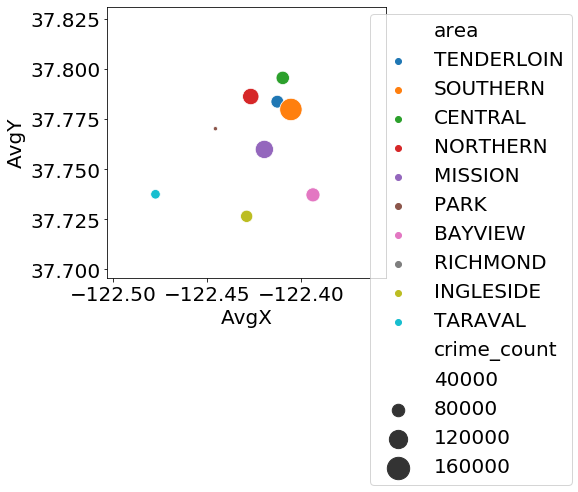

In [145]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=total_district, x='AvgX', y='AvgY', hue='area', size='crime_count', sizes=(0,500) )
plt.legend(loc='upper right', bbox_to_anchor=(1.7,1.01))

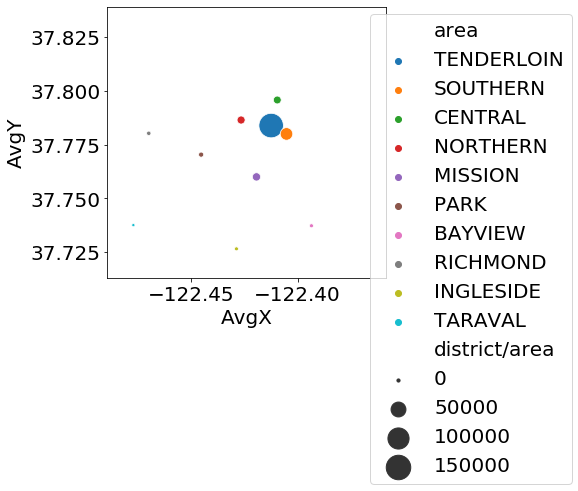

In [146]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=total_district, x='AvgX', y='AvgY', hue='area', size='district/area', sizes=(10,600) )
plt.legend(loc='upper right', bbox_to_anchor=(1.7,1.01))

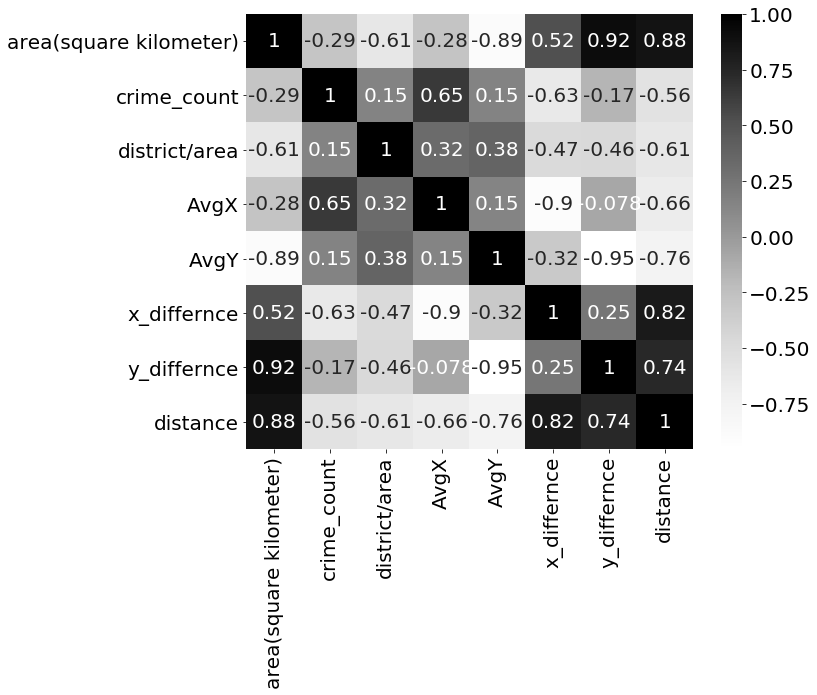

In [149]:
plt.figure(figsize=(10,8))
sns.heatmap(total_district.corr(), annot=True, cmap='Greys')

In [152]:
train.Address.value_counts()

800 Block of BRYANT ST        26533
800 Block of MARKET ST         6581
2000 Block of MISSION ST       5097
1000 Block of POTRERO AV       4063
900 Block of MARKET ST         3251
                              ...  
JERSEY ST / CHATTANOOGA ST        1
MUNICH ST / CORDOVA ST            1
HAVELOCK ST / EDNA ST             1
JONES ST / MACONDRAY ST           1
38TH AV / MORAGA ST               1
Name: Address, Length: 23228, dtype: int64